In [16]:
import numpy as np
import matplotlib.pyplot as plt
import jupyter as j

In [ ]:
    if key == 'Signal power':
        return max(-1300, val)
    if key == 'ECL':
        return min(3, val)
    if key == 'SNR':
        return max(-200, val)
    if key == 'txTime':
        if val > 200000:
            return 20000
    if key == 'energy':
        return min(100000, val)
    if key == 'TX power':
        if val < -1000:
            return -100
    if key == 'EARFCN':
        return min(10000, val)
    if key == 'PCI':
        if val > 1000:
            return 0
    if key == 'RSRQ':
        if val < -1000:
            return 0

In [19]:
def vfilter(a, key=''):
    a = np.array(a)
    if key == 'Signal power':
        a = a[a > -1300]
    if key == 'ECL':
        return min(3, val)
    if key == 'SNR':
        return max(-200, val)
    if key == 'txTime':
        if val > 200000:
            return 20000
    if key == 'energy':
        return min(100000, val)
    if key == 'TX power':
        if val < -1000:
            return -100
    if key == 'EARFCN':
        return min(10000, val)
    if key == 'PCI':
        if val > 1000:
            return 0
    if key == 'RSRQ':
        if val < -1000:
            return 0
    return a

vfilter([1,2,3,5,6,8,5,6,6,])

array([1, 2, 3, 8])

In [14]:
def plot(x, y, xr, yr, files, colour):
    for f in files:
        zu_mg = j.merge(j.mk(f))
        if zu_mg:
            plt.plot(np.array(zu_mg[x])/xr, np.array(zu_mg[y])/yr, colour)
            
def compare_ue(text, ylabel, xlabel, ky, kx, ry, rx):
    fx = 14
    fy = 4
    sx = 1
    sy = 2
    j.debug = False
    plt.figure(figsize=(fx, fy))
    plt.suptitle(text)

    plt.subplot(sx, sy, 1)
    plt.xlabel('Ublox ' + xlabel)
    plt.ylabel(ylabel)
    j.dirr = 'logs/zte_mtn/rf_shield/ublox/'
    plot(kx, ky, rx, ry, files, 'g*')
    j.dirr = 'logs/nokia_vodacom/centurycity/ublox/'
    plot(kx, ky, rx, ry, files, 'b*')

    plt.subplot(sx, sy, 2)
    plt.xlabel('Quectel ' + xlabel)
    j.dirr = 'logs/zte_mtn/rf_shield/quectel/'
    plot(kx, ky, rx, ry, files, 'k*')
    j.dirr = 'logs/nokia_vodacom/centurycity/quectel/'
    plot(kx, ky, rx, ry, files, 'r*')

    plt.savefig('img/vodacom_vs_mtn_ue' + "_".join(text.split()) + '.png')
    plt.show()
    
def compare_nw(text, ylabel, xlabel, ky, kx, ry, rx):
    fx = 14
    fy = 4
    sx = 1
    sy = 2
    j.debug = False
    plt.figure(figsize=(fx, fy))
    plt.suptitle(text)

    plt.subplot(sx, sy, 1)
    plt.xlabel('MTN ZTE ' + xlabel)
    plt.ylabel(ylabel)
    j.dirr = 'logs/zte_mtn/rf_shield/ublox/'
    plot(kx, ky, rx, ry, files, 'g*')
    j.dirr = 'logs/zte_mtn/rf_shield/quectel/'
    plot(kx, ky, rx, ry, files, 'k*')

    plt.subplot(sx, sy, 2)
    plt.xlabel('Vodacom Nokia ' + xlabel)
    
    j.dirr = 'logs/nokia_vodacom/centurycity/ublox/'
    plot(kx, ky, rx, ry, files, 'b*')
    j.dirr = 'logs/nokia_vodacom/centurycity/quectel/'
    plot(kx, ky, rx, ry, files, 'r*')
    plt.savefig('img/vodacom_vs_mtn_nw' + "_".join(text.split()) + '.png')
    plt.show()
    
def compare(text, ylabel, xlabel, ky, kx, ry, rx):
    compare_ue(text, ylabel, xlabel, ky, kx, ry, rx)
    compare_nw(text, ylabel, xlabel, ky, kx, ry, rx)
    
files = ['release/release1/*','release/release16/*','release/release64/*','release/release128/*','release/release256/*','release/release512/*', 'release/release0/*']

Energy consumed when sending a single datagram using 

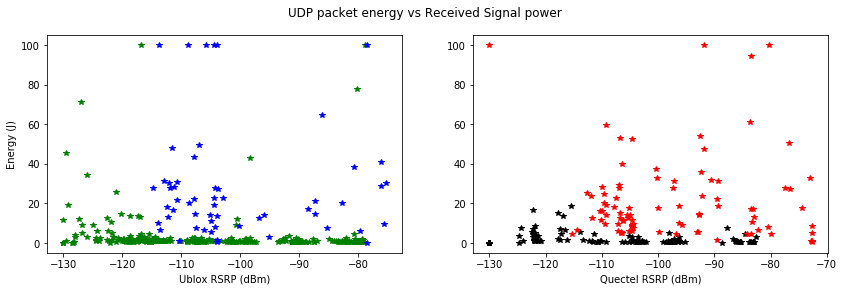

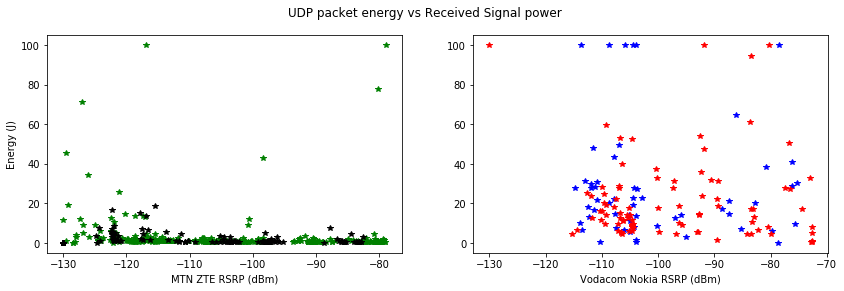

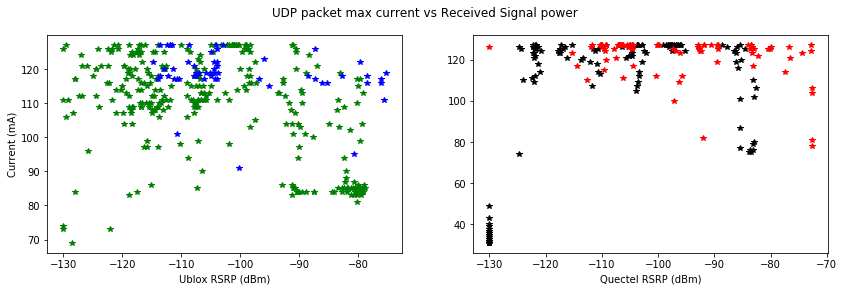

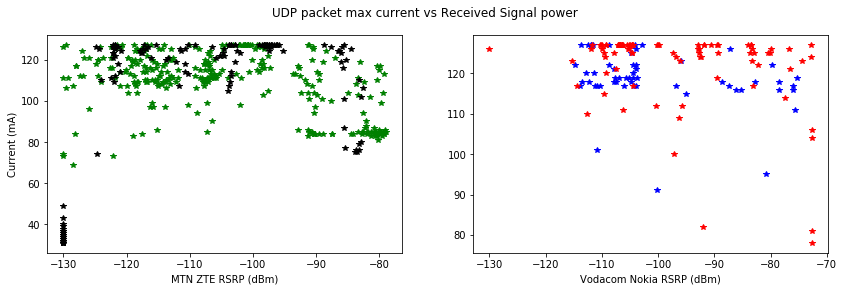

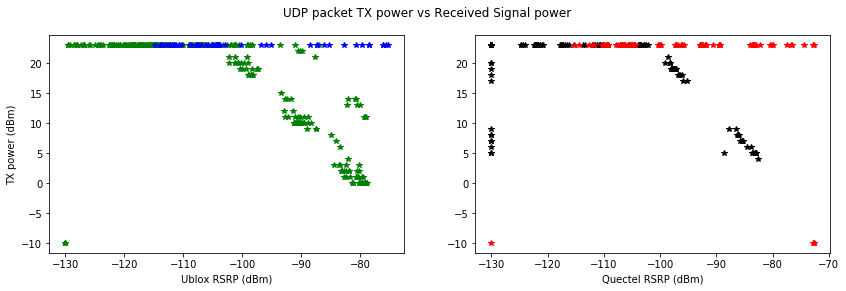

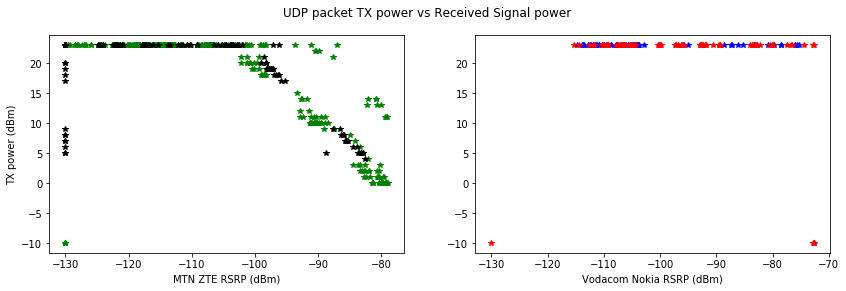

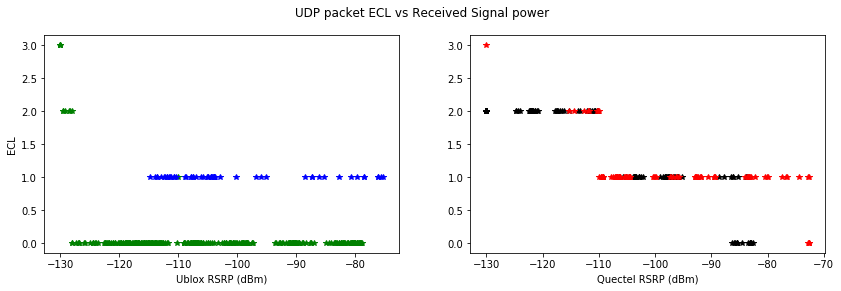

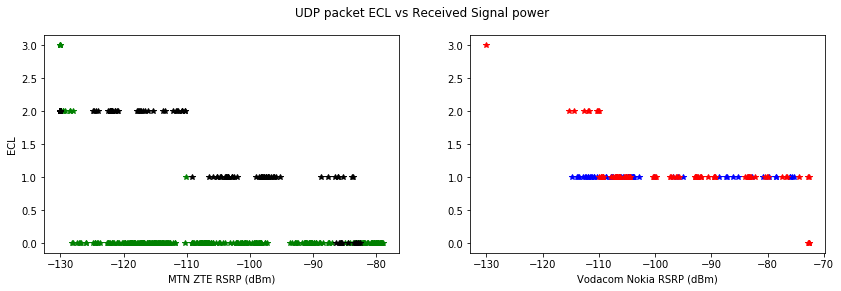

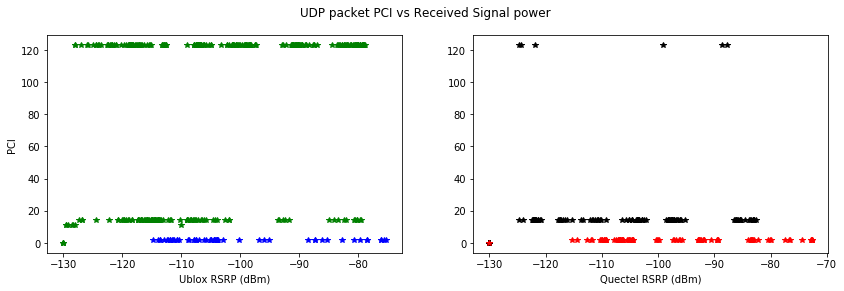

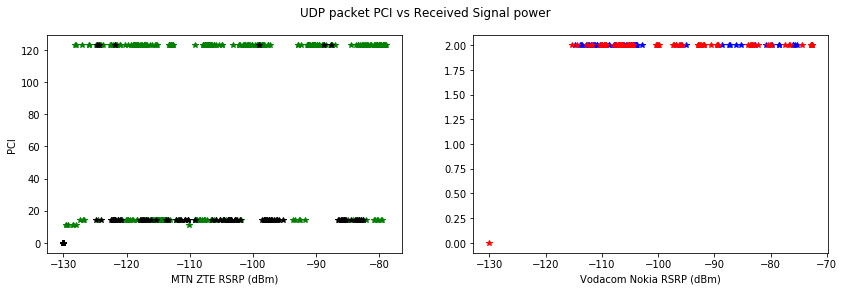

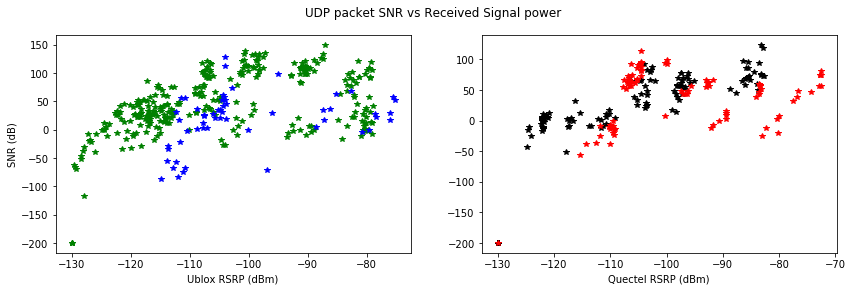

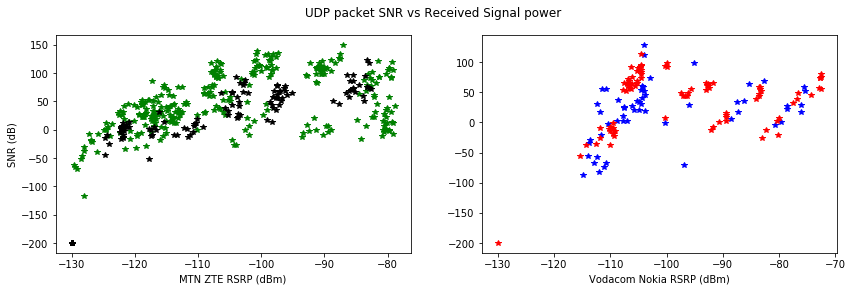

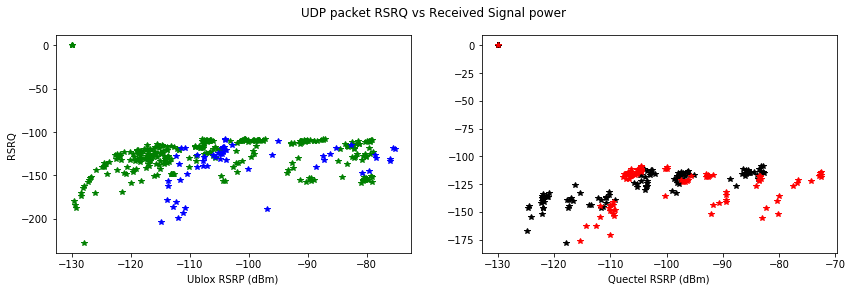

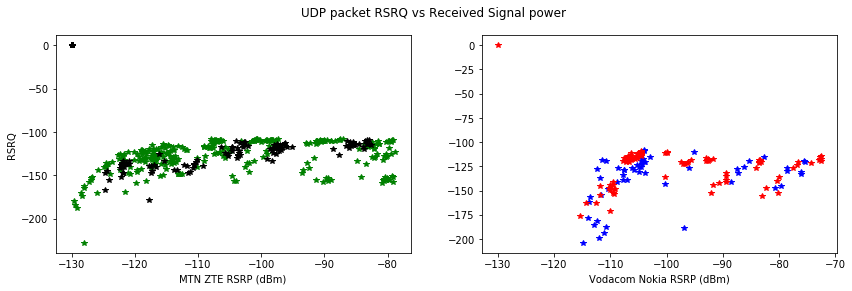

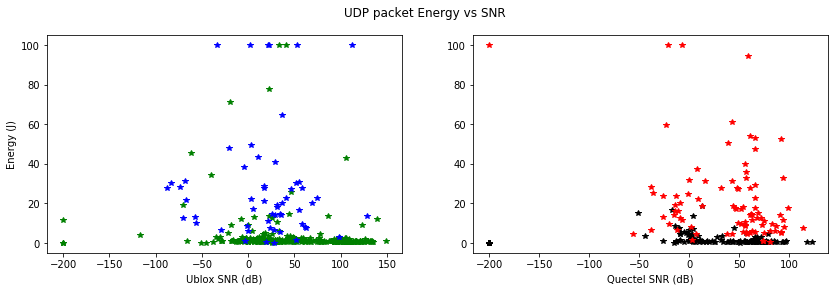

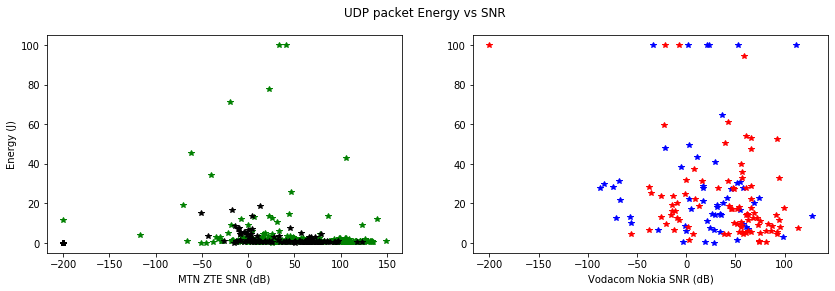

In [8]:
compare('UDP packet energy vs Received Signal power', 'Energy (J)', 'RSRP (dBm)', 'energy', 'Signal power', 1000, 10)
compare('UDP packet max current vs Received Signal power', 'Current (mA)', 'RSRP (dBm)', 'maxCurrent', 'Signal power', 1, 10)
compare('UDP packet TX power vs Received Signal power', 'TX power (dBm)', 'RSRP (dBm)', 'TX power', 'Signal power', 10, 10)
compare('UDP packet ECL vs Received Signal power', 'ECL', 'RSRP (dBm)', 'ECL', 'Signal power', 1, 10)
compare('UDP packet PCI vs Received Signal power', 'PCI', 'RSRP (dBm)', 'PCI', 'Signal power', 1, 10)
compare('UDP packet SNR vs Received Signal power', 'SNR (dB)', 'RSRP (dBm)', 'SNR', 'Signal power', 1, 10)
compare('UDP packet RSRQ vs Received Signal power', 'RSRQ', 'RSRP (dBm)', 'RSRQ', 'Signal power', 1, 10)
compare('UDP packet Energy vs SNR', 'Energy (J)', 'SNR (dB)', 'energy', 'SNR', 1000, 1)